In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys

# Exploratory Data Analysis

In [35]:
# Get the current working directory
current_dir = os.getcwd()
# Move up one level from the current directory
parent_dir = os.path.dirname(current_dir)
# Change directory into data directory
data_dir = os.path.join(parent_dir, 'data')
# Add the parent directory to the Python path
sys.path.append(parent_dir)

In [36]:
df = pd.read_csv(os.path.join(data_dir, 'raw_data.csv'), index_col=None)
df.head()

,date,customer_name,country,review_body,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,19th March 2025,J Meares,(United Kingdom),✅ Trip Verified | Flight mainly let down by ...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes
1,16th March 2025,Luis De Jesus,(United States),✅ Trip Verified | Another awful experience b...,NaN,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,16th March 2025,Luis De Jesus,(United States),"✅ Trip Verified | The service was rude, full...",NaN,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no
3,16th March 2025,Luis De Jesus,(United States),✅ Trip Verified | This flight was a joke. Th...,NaN,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no
4,7th March 2025,Paul Mercer,(United Kingdom),✅ Trip Verified | This time British Airways ...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   customer_name           3000 non-null   object 
 2   country                 3000 non-null   object 
 3   review_body             3000 non-null   object 
 4   Aircraft                1930 non-null   object 
 5   Type Of Traveller       2997 non-null   object 
 6   Seat Type               3000 non-null   object 
 7   Route                   2994 non-null   object 
 8   Date Flown              3000 non-null   object 
 9   Seat Comfort            2874 non-null   float64
 10  Cabin Staff Service     2859 non-null   float64
 11  Food & Beverages        2570 non-null   float64
 12  Inflight Entertainment  1806 non-null   float64
 13  Ground Service          2931 non-null   float64
 14  Wifi & Connectivity     669 non-null    

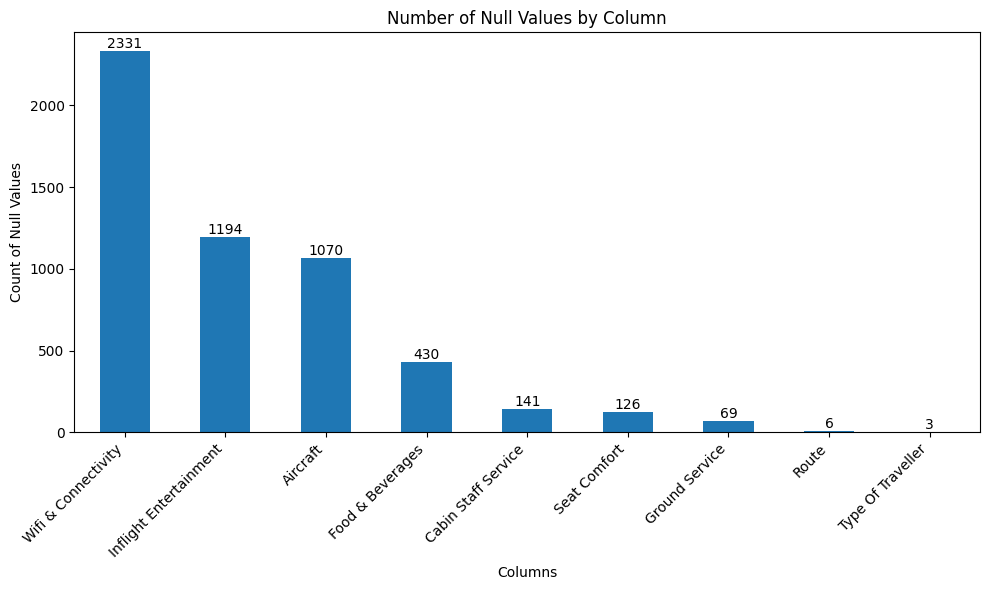

In [38]:
def visualize_null_values(df: pd.DataFrame) -> None:
    """
    Visualize the null values in the dataframe using a bar chart, showing only columns with nulls in descending order
    Args:
        df (pd.DataFrame): The dataframe to visualize
    Returns:
        None
    """
    # Get null counts and filter for columns with nulls, then sort descending
    null_counts = df.isnull().sum()
    null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    ax = null_counts.plot(kind='bar')
    
    # Add value labels on top of each bar
    for i, v in enumerate(null_counts):
        ax.text(i, v, str(v), ha='center', va='bottom')
        
    plt.title('Number of Null Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Count of Null Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

visualize_null_values(df)


# 1. Renaming columns

In [39]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    """ 
    Rename the columns of the dataframe snake case
    Args:
        df (pd.DataFrame): The dataframe to rename
    Returns:
        pd.DataFrame: The renamed dataframe
    """
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

    # handling edge cases of & and -
    df.columns = df.columns.str.replace("&", "and")
    df.columns = df.columns.str.replace("-", "_")
    df.rename(columns={'date': 'date_submitted', 'country': 'nationality'}, inplace=True)

    return df

In [40]:
df = rename_columns(df)
df.columns

Index(['date_submitted', 'customer_name', 'nationality', 'review_body',
       'aircraft', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_and_beverages',
       'inflight_entertainment', 'ground_service', 'wifi_and_connectivity',
       'value_for_money', 'recommended'],
      dtype='object')

In [41]:
df.head()

,date_submitted,customer_name,nationality,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,19th March 2025,J Meares,(United Kingdom),✅ Trip Verified | Flight mainly let down by ...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes
1,16th March 2025,Luis De Jesus,(United States),✅ Trip Verified | Another awful experience b...,NaN,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,16th March 2025,Luis De Jesus,(United States),"✅ Trip Verified | The service was rude, full...",NaN,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no
3,16th March 2025,Luis De Jesus,(United States),✅ Trip Verified | This flight was a joke. Th...,NaN,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no
4,7th March 2025,Paul Mercer,(United Kingdom),✅ Trip Verified | This time British Airways ...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes


# 2. Clean date_submitted column

In [42]:
def clean_date_submitted_column(df: pd.DataFrame) -> pd.DataFrame:
    """ 
    Clean the date_submitted column by converting to datetime and setting the date format
    Args:
        df (pd.DataFrame): The dataframe to clean
    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    # Convert date format from "19th March 2025" to "03/19/2025"
    df['date_submitted'] = df['date_submitted'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
    df['date_submitted'] = pd.to_datetime(df['date_submitted'], format='%d %B %Y')
    df['date_submitted'] = df['date_submitted'].dt.strftime('%Y-%m-%d')
    
    return df


In [43]:
df = clean_date_submitted_column(df)
df.head()

,date_submitted,customer_name,nationality,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,2025-03-19,J Meares,(United Kingdom),✅ Trip Verified | Flight mainly let down by ...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes
1,2025-03-16,Luis De Jesus,(United States),✅ Trip Verified | Another awful experience b...,NaN,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,2025-03-16,Luis De Jesus,(United States),"✅ Trip Verified | The service was rude, full...",NaN,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no
3,2025-03-16,Luis De Jesus,(United States),✅ Trip Verified | This flight was a joke. Th...,NaN,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no
4,2025-03-07,Paul Mercer,(United Kingdom),✅ Trip Verified | This time British Airways ...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes


# 3. Clean country column

In [44]:
def clean_nationality_column(df: pd.DataFrame) -> pd.DataFrame:
    """ 
    Clean the nationality column by removing the parentheses and any extra spaces
    Args:
        df (pd.DataFrame): The dataframe to clean
    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    df['nationality'] = df['nationality'].str.replace(r'[()]', '', regex=True).str.strip()
    return df

In [45]:
df = clean_nationality_column(df)
df.head()

,date_submitted,customer_name,nationality,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,2025-03-19,J Meares,United Kingdom,✅ Trip Verified | Flight mainly let down by ...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes
1,2025-03-16,Luis De Jesus,United States,✅ Trip Verified | Another awful experience b...,NaN,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,2025-03-16,Luis De Jesus,United States,"✅ Trip Verified | The service was rude, full...",NaN,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no
3,2025-03-16,Luis De Jesus,United States,✅ Trip Verified | This flight was a joke. Th...,NaN,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no
4,2025-03-07,Paul Mercer,United Kingdom,✅ Trip Verified | This time British Airways ...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes


# 4. Create verify column

In [46]:
def create_verify_column(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a verify column by checking the verification status from the review_body
    Args:
        df (pd.DataFrame): The dataframe to create the verify column
    Returns:
        pd.DataFrame: The dataframe with the verify column
    """
    verify_status = df['review_body'].str.contains('trip verified', case=False, na=False)
    
    if 'verify' in df.columns:
        df = df.drop('verify', axis=1)

    df.insert(
        loc=3, # Insert after review_body column
        column='verify',
        value=verify_status
    )
    
    return df


In [47]:
df = create_verify_column(df)
df.head()

,date_submitted,customer_name,nationality,verify,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,2025-03-19,J Meares,United Kingdom,True,✅ Trip Verified | Flight mainly let down by ...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes
1,2025-03-16,Luis De Jesus,United States,True,✅ Trip Verified | Another awful experience b...,NaN,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,2025-03-16,Luis De Jesus,United States,True,"✅ Trip Verified | The service was rude, full...",NaN,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no
3,2025-03-16,Luis De Jesus,United States,True,✅ Trip Verified | This flight was a joke. Th...,NaN,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no
4,2025-03-07,Paul Mercer,United Kingdom,True,✅ Trip Verified | This time British Airways ...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes


# 5. Clean review_body

In [48]:
def clean_review_body(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the review_body column by removing the verification status
    Args:
        df (pd.DataFrame): The dataframe to clean
    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    # Split review body on '|' and take second part, stripping whitespace
    df.loc[df['verify'], 'review_body'] = df.loc[df['verify'], 'review_body'].str.split('|').str[1].str.strip()
    
    return df

In [49]:
df = clean_review_body(df)
df.head()

,date_submitted,customer_name,nationality,verify,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,2025-03-19,J Meares,United Kingdom,True,Flight mainly let down by a disagreeable fligh...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes
1,2025-03-16,Luis De Jesus,United States,True,Another awful experience by British Airways. T...,NaN,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,2025-03-16,Luis De Jesus,United States,True,"The service was rude, full of attitude to me, ...",NaN,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no
3,2025-03-16,Luis De Jesus,United States,True,This flight was a joke. There was four people ...,NaN,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no
4,2025-03-07,Paul Mercer,United Kingdom,True,This time British Airways managed to get every...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes


# 6. Clean date_flown

In [50]:
def clean_date_flown_column(df: pd.DataFrame) -> pd.DataFrame:
    """
    Assume the date is the first of the month as no date is provided.
    Clean the date_flown column by converting to datetime and setting the date format YYYY-MM-DD. 
    Args:
        df (pd.DataFrame): The dataframe to clean
    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    df['date_flown'] = pd.to_datetime(df['date_flown'], format='%B %Y')
    df['date_flown'] = df['date_flown'].dt.strftime('%Y-%m-%d')
    return df

In [51]:
df = clean_date_flown_column(df)
df.head()

,date_submitted,customer_name,nationality,verify,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,2025-03-19,J Meares,United Kingdom,True,Flight mainly let down by a disagreeable fligh...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5.0,2.0,5.0,5.0,4.0,1.0,4,yes
1,2025-03-16,Luis De Jesus,United States,True,Another awful experience by British Airways. T...,NaN,Business,Business Class,London to Geneva,2024-12-01,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,2025-03-16,Luis De Jesus,United States,True,"The service was rude, full of attitude to me, ...",NaN,Business,Premium Economy,London to New York,2025-01-01,1.0,1.0,1.0,NaN,5.0,NaN,1,no
3,2025-03-16,Luis De Jesus,United States,True,This flight was a joke. There was four people ...,NaN,Business,Business Class,Chambery to London,2025-01-01,1.0,1.0,2.0,NaN,1.0,NaN,1,no
4,2025-03-07,Paul Mercer,United Kingdom,True,This time British Airways managed to get every...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,2025-03-01,5.0,5.0,4.0,4.0,5.0,4.0,5,yes


# 7. Clean Recommended

In [52]:
def clean_recommended_column(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the recommended column by converting to boolean
    Args:
        df (pd.DataFrame): The dataframe to clean
    Returns:
        pd.DataFrame: The dataframe with the recommended column converted to boolean
    """
    df['recommended'] = df['recommended'].str.contains('yes', case=False, na=False)

    return df

In [53]:
df = clean_recommended_column(df)
df.head()

,date_submitted,customer_name,nationality,verify,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,2025-03-19,J Meares,United Kingdom,True,Flight mainly let down by a disagreeable fligh...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5.0,2.0,5.0,5.0,4.0,1.0,4,True
1,2025-03-16,Luis De Jesus,United States,True,Another awful experience by British Airways. T...,NaN,Business,Business Class,London to Geneva,2024-12-01,1.0,1.0,NaN,NaN,1.0,NaN,1,False
2,2025-03-16,Luis De Jesus,United States,True,"The service was rude, full of attitude to me, ...",NaN,Business,Premium Economy,London to New York,2025-01-01,1.0,1.0,1.0,NaN,5.0,NaN,1,False
3,2025-03-16,Luis De Jesus,United States,True,This flight was a joke. There was four people ...,NaN,Business,Business Class,Chambery to London,2025-01-01,1.0,1.0,2.0,NaN,1.0,NaN,1,False
4,2025-03-07,Paul Mercer,United Kingdom,True,This time British Airways managed to get every...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,2025-03-01,5.0,5.0,4.0,4.0,5.0,4.0,5,True


# 8. Clean Rating columns

In [54]:
def clean_rating_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the rating columns by converting to int, preserving NaN values
    Args:
        df (pd.DataFrame): The dataframe to clean
    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 
                     'wifi_and_connectivity', 'value_for_money']
    
    for col in rating_columns:
        # Convert to float first to preserve NaN, then to Int64 which can handle NaN
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
    
    return df


In [55]:
df = clean_rating_columns(df)
df.head()

,date_submitted,customer_name,nationality,verify,review_body,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,2025-03-19,J Meares,United Kingdom,True,Flight mainly let down by a disagreeable fligh...,Boeing 787,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5,2,5,5.0,4.0,1,4,True
1,2025-03-16,Luis De Jesus,United States,True,Another awful experience by British Airways. T...,NaN,Business,Business Class,London to Geneva,2024-12-01,1,1,<NA>,NaN,1.0,<NA>,1,False
2,2025-03-16,Luis De Jesus,United States,True,"The service was rude, full of attitude to me, ...",NaN,Business,Premium Economy,London to New York,2025-01-01,1,1,1,NaN,5.0,<NA>,1,False
3,2025-03-16,Luis De Jesus,United States,True,This flight was a joke. There was four people ...,NaN,Business,Business Class,Chambery to London,2025-01-01,1,1,2,NaN,1.0,<NA>,1,False
4,2025-03-07,Paul Mercer,United Kingdom,True,This time British Airways managed to get every...,Boeing 777,Business,Premium Economy,Gatwick to Antigua,2025-03-01,5,5,4,4.0,5.0,4,5,True


# 9. Clean Route Column

In [56]:
import re
from typing import Dict, Tuple, List, Optional, Union

In [57]:
import scripts.config as cfg

In [58]:
def parse_route(route: str) -> Dict[str, Union[str, None]]:
    """
    Parse a route string into origin, destination, and transit components,
    and further extract city and airport information.
    
    Args:
        route (str): The route string to parse (e.g., "London Heathrow to Paris CDG via Amsterdam")
        
    Returns:
        Dict: A dictionary containing the parsed components:
            - origin: The full origin string
            - destination: The full destination string
            - transit: The full transit string (if any)
            - origin_city: The extracted origin city
            - origin_airport: The extracted origin airport (3-letter IATA code)
            - destination_city: The extracted destination city
            - destination_airport: The extracted destination airport (3-letter IATA code)
            - transit_city: The extracted transit city (if any)
            - transit_airport: The extracted transit airport (3-letter IATA code)
    """
    # Map of airport codes to their cities
    AIRPORT_TO_CITY = cfg.AIRPORT_TO_CITY
    # Map of airport names/keywords to their 3-letter IATA codes
    AIRPORT_CODES = cfg.AIRPORT_CODES
    # Map of city names to their common airport codes
    CITY_TO_AIRPORT = cfg.CITY_TO_AIRPORT
    
    def extract_city_airport(location: str) -> Tuple[Optional[str], Optional[str]]:
        """
        Extract city and airport from a location string.
        
        Args:
            location (str): The location string to parse (e.g., "London Heathrow", "JFK", "Paris CDG")
            
        Returns:
            Tuple[str, str]: A tuple containing (city, airport) where airport is a 3-letter IATA code
                             and city is the proper city name (not the airport code)
        """
        if not location or pd.isna(location) or location.strip() == '':
            return None, None
        
        location = location.strip().lower()
        
        # Check for 3-letter codes that might be IATA codes
        iata_match = re.search(r'\b([a-z]{3})\b', location)
        if iata_match:
            code = iata_match.group(1).upper()
            # If it's a valid code in our dictionary
            if code in AIRPORT_TO_CITY:
                # Get the city for this airport code
                city = AIRPORT_TO_CITY[code]
                return city, code
            
            # If we don't know the city for this code but it's a valid format
            if code in [v for v in AIRPORT_CODES.values()]:
                # Try to extract the city from the location
                location_without_code = re.sub(r'\b' + iata_match.group(1) + r'\b', '', location).strip()
                if location_without_code:
                    return location_without_code.title(), code
                else:
                    # If we can't determine the city, use a placeholder
                    return "Unknown", code
        
        # Check for known airport names in the location
        for airport_name, airport_code in AIRPORT_CODES.items():
            if airport_name in location:
                # Get the city for this airport code
                if airport_code in AIRPORT_TO_CITY:
                    city = AIRPORT_TO_CITY[airport_code]
                    return city, airport_code
                
                # If we don't have a mapping for this airport code
                # Extract the city part from the location
                city_part = location.replace(airport_name, '').strip()
                if city_part:
                    return city_part.title(), airport_code
                else:
                    # If we can't determine the city, use a placeholder
                    return "Unknown", airport_code
        
        # Check for city names that have default airports
        for city_name, airport_code in CITY_TO_AIRPORT.items():
            if city_name in location and len(city_name) > 3:  # Exclude 3-letter airport codes
                return city_name.title(), airport_code
        
        # If we reach here, we couldn't identify an airport code
        # Return the location as the city and None for airport
        return location.title(), None
    
    if not route or pd.isna(route) or route.strip() == '':
        return {
            'origin': None, 'destination': None, 'transit': None,
            'origin_city': None, 'origin_airport': None,
            'destination_city': None, 'destination_airport': None,
            'transit_city': None, 'transit_airport': None
        }
    
    # Normalize the route string
    route = route.strip()
    
    # Initialize result dictionary
    result = {
        'origin': None, 'destination': None, 'transit': None,
        'origin_city': None, 'origin_airport': None,
        'destination_city': None, 'destination_airport': None,
        'transit_city': None, 'transit_airport': None
    }
    
    # Check if route contains 'via' for transit
    if ' via ' in route.lower():
        parts = route.lower().split(' via ')
        main_route = parts[0]
        transit = parts[1]
        
        # Split main route into origin and destination
        if ' to ' in main_route:
            origin_dest = main_route.split(' to ')
            origin = origin_dest[0].strip()
            destination = origin_dest[1].strip() if len(origin_dest) > 1 else None
        else:
            origin = main_route.strip()
            destination = None
        
        # Store the original values
        result['origin'] = origin.title() if origin else None
        result['destination'] = destination.title() if destination else None
        result['transit'] = transit.title() if transit else None
        
        # Extract city and airport for each component
        if origin:
            origin_city, origin_airport = extract_city_airport(origin)
            result['origin_city'] = origin_city
            result['origin_airport'] = origin_airport
        
        if destination:
            dest_city, dest_airport = extract_city_airport(destination)
            result['destination_city'] = dest_city
            result['destination_airport'] = dest_airport
        
        if transit:
            transit_city, transit_airport = extract_city_airport(transit)
            result['transit_city'] = transit_city
            result['transit_airport'] = transit_airport
    
    # For routes without transit
    elif ' to ' in route.lower():
        parts = route.lower().split(' to ')
        origin = parts[0].strip()
        destination = parts[1].strip() if len(parts) > 1 else None
        
        # Store the original values
        result['origin'] = origin.title() if origin else None
        result['destination'] = destination.title() if destination else None
        
        # Extract city and airport for each component
        if origin:
            origin_city, origin_airport = extract_city_airport(origin)
            result['origin_city'] = origin_city
            result['origin_airport'] = origin_airport
        
        if destination:
            dest_city, dest_airport = extract_city_airport(destination)
            result['destination_city'] = dest_city
            result['destination_airport'] = dest_airport
    
    # For single location (unlikely but handling edge case)
    else:
        origin = route.strip()
        result['origin'] = origin.title()
        
        # Extract city and airport
        origin_city, origin_airport = extract_city_airport(origin)
        result['origin_city'] = origin_city
        result['origin_airport'] = origin_airport
    
    return result

In [59]:
def cleaning_route_column(df: pd.DataFrame, route_column: str = 'route') -> pd.DataFrame:
    """
    Process a DataFrame containing route information.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the route information
        route_column (str): The name of the column containing the route strings
        
    Returns:
        pd.DataFrame: The processed DataFrame with added columns for route components
    """
    if route_column not in df.columns:
        raise ValueError(f"Column '{route_column}' not found in DataFrame")
    
    # Apply the parse_route function to each route
    route_components = df[route_column].apply(parse_route)
    
    # Extract the components into separate columns
    df['origin'] = route_components.apply(lambda x: x['origin'])
    df['destination'] = route_components.apply(lambda x: x['destination'])
    df['transit'] = route_components.apply(lambda x: x['transit'])
    df['origin_city'] = route_components.apply(lambda x: x['origin_city'])
    df['origin_airport'] = route_components.apply(lambda x: x['origin_airport'])
    df['destination_city'] = route_components.apply(lambda x: x['destination_city'])
    df['destination_airport'] = route_components.apply(lambda x: x['destination_airport'])
    df['transit_city'] = route_components.apply(lambda x: x['transit_city'])
    df['transit_airport'] = route_components.apply(lambda x: x['transit_airport'])
    
    df.drop(['origin', 'transit', 'destination', 'route'], axis=1, inplace=True)
    return df


In [60]:
df = cleaning_route_column(df)

In [61]:
df.head(3)

,date_submitted,customer_name,nationality,verify,review_body,aircraft,type_of_traveller,seat_type,date_flown,seat_comfort,...,ground_service,wifi_and_connectivity,value_for_money,recommended,origin_city,origin_airport,destination_city,destination_airport,transit_city,transit_airport
0,2025-03-19,J Meares,United Kingdom,True,Flight mainly let down by a disagreeable fligh...,Boeing 787,Solo Leisure,Business Class,2025-03-01,5,...,4.0,1,4,True,Cape Town,CPT,London,LHR,None,None
1,2025-03-16,Luis De Jesus,United States,True,Another awful experience by British Airways. T...,NaN,Business,Business Class,2024-12-01,1,...,1.0,<NA>,1,False,London,LHR,Geneva,GVA,None,None
2,2025-03-16,Luis De Jesus,United States,True,"The service was rude, full of attitude to me, ...",NaN,Business,Premium Economy,2025-01-01,1,...,5.0,<NA>,1,False,London,LHR,New York,JFK,None,None


In [62]:
# print(df['origin_city'].unique())
# print(df['origin_airport'].unique())
print(df['destination_city'].unique())
print(df['destination_airport'].unique())
print(df['transit_city'].unique())
print(df['transit_airport'].unique())

['London' 'Geneva' 'New York' 'Antigua' 'Marrakech' 'Las Vegas' 'Nairobi'
 'Male' 'Zurich' 'Lisbon' 'Manchester' 'Cologne' 'Basel' 'Phoenix'
 'Johannesburg' 'Cape Town' 'Rome' 'Amsterdam' 'Toronto' 'San Diego'
 'Belfast' 'Keflavik' 'Nice' 'Boston' 'Istanbul' 'Barcelona' 'Mexico City'
 'Delhi' 'Vancouver' 'Pittsburgh' 'Berlin' 'Seattle' 'Nassau' 'Chicago'
 'Crete' 'Denver' 'Hong Kong' 'Athens' 'Ibiza' None 'Dallas' 'Tampa'
 'Bologna' 'Los Angeles' 'Doha' 'Munich' 'São Paulo' 'Corfu' 'Verona'
 'Paris' 'Singapore' 'Miami' 'Hannover' 'Copenhagen' 'Unknown' 'Dublin'
 'Mumbai' 'Tokyo' 'Milan' 'Toulouse' 'Houston' 'Brussels' 'Port Of Spain'
 'Sydney' 'Auckland' 'Oslo' 'Porto' 'Shannon, Ireland' 'Casablanca'
 'Cancun' 'Warsaw' 'Düsseldorf' 'Madrid' 'St Lucia' 'Stockholm' 'Atlanta'
 'Portland' 'Frankfurt' 'Stuttgart' 'Antalya' 'Gibraltar' 'Cairo' 'Austin'
 'Punta Cana' 'Marseille' 'Seville' 'Tirana' 'Faro' 'Malaga' 'Algiers'
 'Vienna' 'Lyon' 'Montpelier' 'Rhodes' 'Edinburgh' 'Naples' 'Bodrum'
 

In [63]:
df.columns

Index(['date_submitted', 'customer_name', 'nationality', 'verify',
       'review_body', 'aircraft', 'type_of_traveller', 'seat_type',
       'date_flown', 'seat_comfort', 'cabin_staff_service',
       'food_and_beverages', 'inflight_entertainment', 'ground_service',
       'wifi_and_connectivity', 'value_for_money', 'recommended',
       'origin_city', 'origin_airport', 'destination_city',
       'destination_airport', 'transit_city', 'transit_airport'],
      dtype='object')

# Testing

In [64]:
assert len(df['seat_type'].unique()) == 4
assert len(df['type_of_traveller'].unique()) == 5
assert len(df['seat_comfort'].unique()) == 6
assert len(df['cabin_staff_service'].unique()) == 6
assert len(df['food_and_beverages'].unique()) == 6
assert len(df['wifi_and_connectivity'].unique()) == 6
assert len(df['value_for_money'].unique()) == 5
assert len(df['recommended'].unique()) == 2

In [65]:
def validate_route_data(df: pd.DataFrame) -> Dict:
    """
    Validate the processed route data.
    
    Args:
        df (pd.DataFrame): The processed DataFrame
        
    Returns:
        Dict: A dictionary containing validation results
    """
    # Count missing values
    missing_values = df[['origin_city', 'origin_airport', 'destination_city', 
                         'destination_airport', 'transit_city', 'transit_airport']].isna().sum()
    
    # Count rows with at least origin and destination
    valid_routes = df[['origin_city', 'destination_city']].notna().all(axis=1).sum()
    
    # Count routes with transit
    routes_with_transit = df['transit_city'].notna().sum()
    
    # Count routes with airport information
    routes_with_origin_airport = df['origin_airport'].notna().sum()
    routes_with_destination_airport = df['destination_airport'].notna().sum()
    routes_with_transit_airport = df['transit_airport'].notna().sum()
    
    # Validate that all airport codes are 3-letter IATA codes
    valid_airport_codes = 0
    for idx, row in df.iterrows():
        valid_origin = pd.isna(row['origin_airport']) or (isinstance(row['origin_airport'], str) and len(row['origin_airport']) == 3 and row['origin_airport'].isupper())
        valid_dest = pd.isna(row['destination_airport']) or (isinstance(row['destination_airport'], str) and len(row['destination_airport']) == 3 and row['destination_airport'].isupper())
        valid_transit = pd.isna(row['transit_airport']) or (isinstance(row['transit_airport'], str) and len(row['transit_airport']) == 3 and row['transit_airport'].isupper())
        
        if valid_origin and valid_dest and valid_transit:
            valid_airport_codes += 1
    
    # Validate that cities are not airport codes
    valid_city_names = 0
    for idx, row in df.iterrows():
        valid_origin_city = pd.isna(row['origin_city']) or (isinstance(row['origin_city'], str) and (len(row['origin_city']) != 3 or not row['origin_city'].isupper()))
        valid_dest_city = pd.isna(row['destination_city']) or (isinstance(row['destination_city'], str) and (len(row['destination_city']) != 3 or not row['destination_city'].isupper()))
        valid_transit_city = pd.isna(row['transit_city']) or (isinstance(row['transit_city'], str) and (len(row['transit_city']) != 3 or not row['transit_city'].isupper()))
        
        if valid_origin_city and valid_dest_city and valid_transit_city:
            valid_city_names += 1
    
    validation_results = {
        'total_rows': len(df),
        'valid_routes': valid_routes,
        'routes_with_transit': routes_with_transit,
        'routes_with_origin_airport': routes_with_origin_airport,
        'routes_with_destination_airport': routes_with_destination_airport,
        'routes_with_transit_airport': routes_with_transit_airport,
        'valid_airport_codes': valid_airport_codes,
        'valid_city_names': valid_city_names,
        'missing_values': missing_values.to_dict()
    }
    
    return validation_results

In [66]:
print(validate_route_data(df))


{'total_rows': 3000, 'valid_routes': np.int64(2989), 'routes_with_transit': np.int64(524), 'routes_with_origin_airport': np.int64(2824), 'routes_with_destination_airport': np.int64(2772), 'routes_with_transit_airport': np.int64(523), 'valid_airport_codes': 3000, 'valid_city_names': 3000, 'missing_values': {'origin_city': 6, 'origin_airport': 176, 'destination_city': 11, 'destination_airport': 228, 'transit_city': 2476, 'transit_airport': 2477}}
